# Working With Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
import matplotlib as mpl
%matplotlib inline
mpl.style.use('clean') # this loads my personal plotting settings
# https://raw.githubusercontent.com/iamlemec/dotfiles/master/python/clean.mplstyle

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Pandas!

## DataFrame

In [5]:
s = pd.Series(np.random.rand(10), index=np.arange(10, 20))
s

10    0.962879
11    0.339614
12    0.819940
13    0.584029
14    0.463523
15    0.301861
16    0.825781
17    0.228495
18    0.607940
19    0.360788
dtype: float64

In [6]:
print(s.index)
print(s.values)

Int64Index([10, 11, 12, 13, 14, 15, 16, 17, 18, 19], dtype='int64')
[0.96287857 0.33961425 0.81993998 0.58402872 0.46352304 0.30186068
 0.82578056 0.22849455 0.60794028 0.36078759]


In [7]:
s.describe()

count    10.000000
mean      0.549485
std       0.253067
min       0.228495
25%       0.344908
50%       0.523776
75%       0.766940
max       0.962879
dtype: float64

In [8]:
df = pd.DataFrame({'ser1': s, 'ser2': np.random.randn(10)})
df.head()

,ser1,ser2
10,0.962879,-0.534737
11,0.339614,0.747492
12,0.819940,-0.413309
13,0.584029,0.358417
14,0.463523,-0.688145


In [9]:
df.describe()

,ser1,ser2
count,10.000000,10.000000
mean,0.549485,0.045158
std,0.253067,0.549465
min,0.228495,-0.688145
25%,0.344908,-0.420260
50%,0.523776,0.084957
75%,0.766940,0.371276
max,0.962879,0.858966


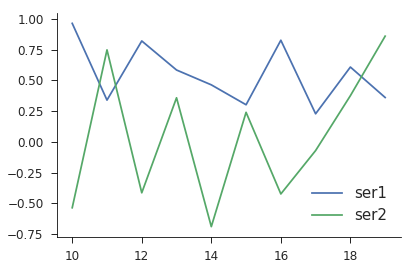

In [10]:
df.plot();

In [11]:
df['ser1']

10    0.962879
11    0.339614
12    0.819940
13    0.584029
14    0.463523
15    0.301861
16    0.825781
17    0.228495
18    0.607940
19    0.360788
Name: ser1, dtype: float64

In [12]:
df['ser1'] > 0.5

10     True
11    False
12     True
13     True
14    False
15    False
16     True
17    False
18     True
19    False
Name: ser1, dtype: bool

In [13]:
df1 = df[df['ser1']>0.5]
df1

,ser1,ser2
10,0.962879,-0.534737
12,0.819940,-0.413309
13,0.584029,0.358417
16,0.825781,-0.422577
18,0.607940,0.375563


In [14]:
df.query('ser1 > 0.5')

,ser1,ser2
10,0.962879,-0.534737
12,0.819940,-0.413309
13,0.584029,0.358417
16,0.825781,-0.422577
18,0.607940,0.375563


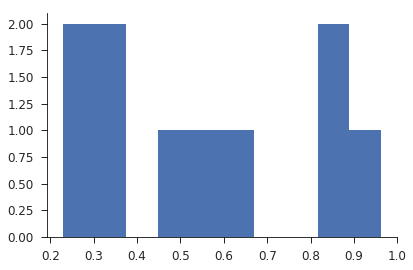

In [15]:
df['ser1'].hist(grid=False);

## Grouping Data

In [16]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block]+np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [17]:
df.head(10)

,block,value
0,2,1.390465
1,3,0.546267
2,1,0.279584
3,1,0.239002
4,2,0.631636
5,0,-0.075283
6,2,1.053114
7,0,-0.107730
8,3,0.183809
9,3,0.417762


In [18]:
df.groupby('block').size()

block
0    27
1    26
2    24
3    23
dtype: int64

In [19]:
df.groupby('block')['value'].mean()

block
0    0.118752
1    0.219888
2    0.338065
3    0.381055
Name: value, dtype: float64

In [20]:
df.groupby('block')['value'].std()

block
0    0.204609
1    0.113031
2    0.410726
3    0.205994
Name: value, dtype: float64

In [21]:
df.groupby('block')['value'].apply(lambda x: np.mean(np.abs(x-np.mean(x))))

block
0    0.164335
1    0.094458
2    0.308214
3    0.162592
Name: value, dtype: float64

In [22]:
grp = df.groupby('block')['value']
pd.DataFrame({
    'mean': grp.mean(),
    'stdv': grp.std(),
    'absd': grp.apply(lambda x: np.mean(np.abs(x-np.mean(x))))
})

,mean,stdv,absd
block,,,
0,0.118752,0.204609,0.164335
1,0.219888,0.113031,0.094458
2,0.338065,0.410726,0.308214
3,0.381055,0.205994,0.162592


## Time Series

In [23]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [24]:
days = pd.date_range('2016-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [25]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(N))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')
df.head()

,price
date,
2016-01-01,0.006447
2016-01-02,0.004153
2016-01-03,0.003122
2016-01-04,0.007976
2016-01-05,0.013635


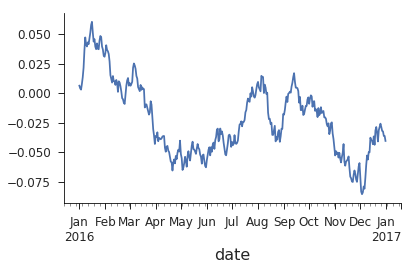

In [26]:
df['price'].plot();

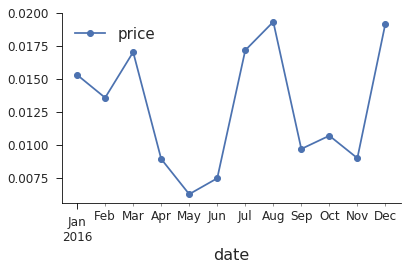

In [27]:
df.groupby(pd.TimeGrouper('MS')).std().plot(marker='o');

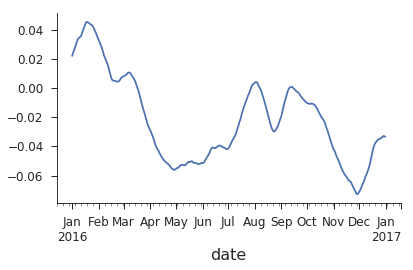

In [28]:
df.rolling(20, center=True, min_periods=5).mean().plot(legend=False);

## Transforming

In [29]:
ret = 0.05 # yearly return
vol = 0.1 # yearly volatility

In [30]:
days = pd.date_range('2006-01-01', '2016-12-31', freq='D')
N = len(days)
T = (days.max()-days.min()).days/365.25
delt = T/N

In [31]:
vals = vol*np.sqrt(delt)*np.cumsum(np.random.randn(len(days)))
df = pd.DataFrame({
    'date': days,
    'price': vals
}).set_index('date')

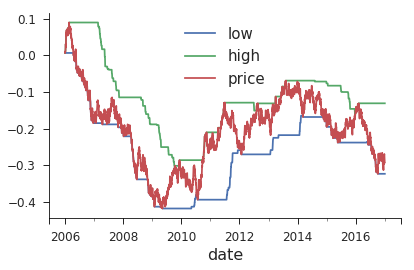

In [32]:
roll = df['price'].rolling(52*7, min_periods=1)
pd.DataFrame({
    'low' : roll.min(),
    'high': roll.max(),
    'price': df['price']
}).plot();

## Plotting

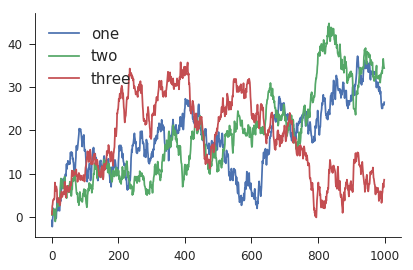

In [33]:
# good way to arrange plots
pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
}).plot();

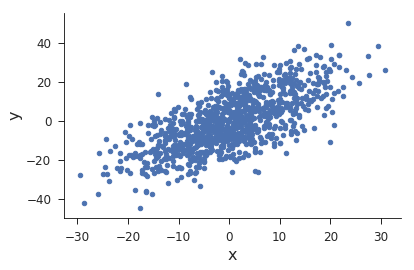

In [34]:
x = 10*np.random.randn(1000)
y = x + 10*np.random.randn(1000)
df = pd.DataFrame({
    'x': x,
    'y': y
})
df.plot.scatter(x='x', y='y');

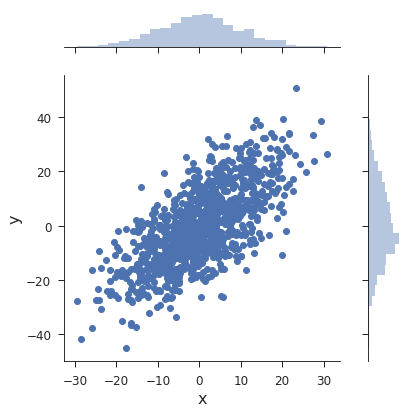

In [35]:
sns.jointplot('x', 'y', data=df);

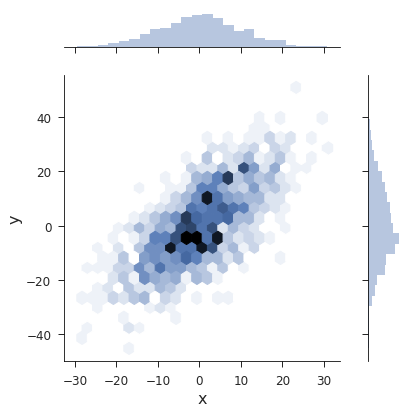

In [36]:
# kind in ['scatter', 'reg', 'resid', 'kde', 'hex']
sns.jointplot('x', 'y', kind='hex', data=df);

## Indexing

In [223]:
df = pd.DataFrame({
    'a': np.arange(10),
    'b': np.random.rand(10)
}, index=np.arange(10, 20))
df

,a,b
10,0,0.887588
11,1,0.506045
12,2,0.853303
13,3,0.004436
14,4,0.100112
15,5,0.273926
16,6,0.298383
17,7,0.299856
18,8,0.087594
19,9,0.056954


In [224]:
# slicing on index
df.loc[14]

a    4.000000
b    0.100112
Name: 14, dtype: float64

In [225]:
# slicing on location
df.iloc[4]

a    4.000000
b    0.100112
Name: 14, dtype: float64

In [226]:
# slicing on column
df['a']

10    0
11    1
12    2
13    3
14    4
15    5
16    6
17    7
18    8
19    9
Name: a, dtype: int64

In [227]:
# selecting
df[df['a']>5]

,a,b
16,6,0.298383
17,7,0.299856
18,8,0.087594
19,9,0.056954


In [228]:
# advanced selecting
df[(df['a']>3)&(df['a']<8)]

,a,b
14,4,0.100112
15,5,0.273926
16,6,0.298383
17,7,0.299856


In [229]:
# selection mechanism
df['a'] > 3

10    False
11    False
12    False
13    False
14     True
15     True
16     True
17     True
18     True
19     True
Name: a, dtype: bool

In [231]:
# querying
df.query('a > 3 and a < 8')

,a,b
14,4,0.100112
15,5,0.273926
16,6,0.298383
17,7,0.299856


## Joining

In [45]:
mapp = pd.Series({x: 2*x for x in range(10)}, name='twox')
mapp

0     0
1     2
2     4
3     6
4     8
5    10
6    12
7    14
8    16
9    18
Name: twox, dtype: int64

In [46]:
init = pd.DataFrame({
    'ser': np.random.randint(10, size=100),
    'val': np.random.rand(100)
})
init.head()

,ser,val
0,0,0.985460
1,3,0.966780
2,4,0.225558
3,7,0.081960
4,4,0.731874


In [47]:
final = init.join(mapp, on='ser')
final.head()

,ser,val,twox
0,0,0.985460,0
1,3,0.966780,6
2,4,0.225558,8
3,7,0.081960,14
4,4,0.731874,8


In [48]:
final['check'] = final['twox'] == 2*final['ser']
final.head()

,ser,val,twox,check
0,0,0.985460,0,True
1,3,0.966780,6,True
2,4,0.225558,8,True
3,7,0.081960,14,True
4,4,0.731874,8,True


In [49]:
print(final['check'].all())

True


## Reshaping

In [50]:
df = pd.DataFrame({
    'row': np.arange(100, 110),
    'src': np.random.randint(10, size=10),
    'dst': np.random.randint(10, size=10),
    'wgt': np.random.rand(10)
})
df

,row,src,dst,wgt
0,100,5,6,0.761179
1,101,0,7,0.096573
2,102,7,9,0.105877
3,103,7,1,0.775607
4,104,4,4,0.222864
5,105,5,6,0.739946
6,106,0,3,0.777479
7,107,2,1,0.957114
8,108,2,4,0.559500
9,109,0,9,0.208700


In [51]:
# go from wide to long data (and melt your brain in the process!)
df1 = pd.melt(df, id_vars=['row', 'wgt'], value_vars=['src', 'dst'], value_name='id')
df1 = df1.sort_values(by=['row', 'variable'])
df1

,row,wgt,variable,id
10,100,0.761179,dst,6
0,100,0.761179,src,5
11,101,0.096573,dst,7
1,101,0.096573,src,0
12,102,0.105877,dst,9
2,102,0.105877,src,7
13,103,0.775607,dst,1
3,103,0.775607,src,7
14,104,0.222864,dst,4
4,104,0.222864,src,4


In [52]:
nodes = df1.groupby('id')
pd.DataFrame({
    'links': nodes.size(),
    'stength': nodes['wgt'].sum()
})

,links,stength
id,,
0,3,1.082751
1,2,1.732721
2,2,1.516614
3,1,0.777479
4,3,1.005228
5,2,1.501125
6,2,1.501125
7,3,0.978057
9,2,0.314577


In [53]:
# total enumeration
df1 = df.stack().rename_axis(['idx', 'var']).rename('val').reset_index()
df1.head(10)

,idx,var,val
0,0,row,100.000000
1,0,src,5.000000
2,0,dst,6.000000
3,0,wgt,0.761179
4,1,row,101.000000
5,1,src,0.000000
6,1,dst,7.000000
7,1,wgt,0.096573
8,2,row,102.000000
9,2,src,7.000000


## Networks

In [54]:
import networkx as nx

In [55]:
df = pd.DataFrame({
    'src': np.random.randint(10, size=20),
    'dst': np.random.randint(10, size=20),
    'wgt': np.random.exponential(size=20)
})
df = df.drop_duplicates(subset=['src', 'dst'])
df = df.query('src != dst')
df.head()

,src,dst,wgt
0,0,8,0.309833
1,3,5,1.105479
2,4,3,0.423954
3,2,6,1.764278
4,0,5,0.004158


In [56]:
G = nx.Graph()
G.add_nodes_from(np.arange(10))
G.add_weighted_edges_from([(x['src'], x['dst'], x['wgt']) for i, x in df.iterrows()])
# G.add_weighted_edges_from(df[['src', 'dst', 'wgt']].values) # equivalent
G

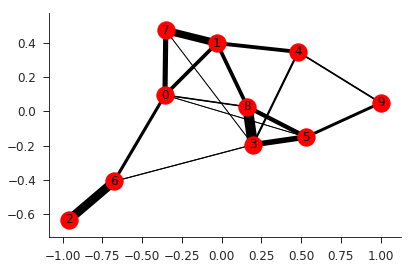

In [57]:
edgewidth = [5*d['weight'] for (u,v,d) in G.edges(data=True)]
pos = nx.spring_layout(G, iterations=50)
nx.draw_networkx(G, pos);
nx.draw_networkx_edges(G, pos, width=edgewidth);

In [58]:
nx.centrality.eigenvector.eigenvector_centrality(G, weight='weight')

{0: 0.25544470248268347,
 1: 0.3477241811847562,
 2: 0.06898304409536658,
 3: 0.5188993542263642,
 4: 0.1634630666649795,
 5: 0.35692463492637755,
 6: 0.12332748481260392,
 7: 0.255023458064512,
 8: 0.5461670253859102,
 9: 0.08461841484332562}

## Input/Output

In [59]:
df = pd.DataFrame({
    'one': np.cumsum(np.random.randn(1000)),
    'two': np.cumsum(np.random.randn(1000)),
    'three': np.cumsum(np.random.randn(1000))
})
df.to_csv('test.csv', index=False)

In [60]:
!head test.csv

one,two,three
0.013926483408733755,-0.6042212028802622,0.9826070380486858
0.6866631315961871,-0.07761905250105172,0.23331533806433602
1.8797947561738961,-0.15853245308418823,0.2626151161540442
2.3167479054704967,0.07980370441661472,-0.04377376889178081
2.4832230304031233,-1.2926508198242563,-0.7123723731210496
2.535989779934483,-1.2276393592800197,-0.6849331708667845
2.1609304180404214,-1.878740878478852,2.426226991391178
3.09783695782315,-0.5893589006390951,1.6337478490476998
3.4326355047339683,-0.6664468863141431,0.5777112097403152


In [61]:
df = pd.read_csv('test.csv')
df.head()

,one,two,three
0,0.013926,-0.604221,0.982607
1,0.686663,-0.077619,0.233315
2,1.879795,-0.158532,0.262615
3,2.316748,0.079804,-0.043774
4,2.483223,-1.292651,-0.712372


Can also use the many `pd.DataFrame.to_*` and `pd.read_*` function where `*` is one of:
- csv
- excel
- json
- html
- latex
- stata
- sql

## External Data

In [62]:
import pandas_datareader as pdr

In [63]:
emp = pdr.fred.FredReader(['UNRATE', 'LNS12300060'], start='1948-01-01').read()
emp = emp.rename(columns={'UNRATE': 'unemp', 'LNS12300060': 'empop'}).rename_axis('date')
emp.head()

,unemp,empop
date,,
1948-01-01,3.4,62.6
1948-02-01,3.8,62.7
1948-03-01,4.0,62.6
1948-04-01,3.9,62.9
1948-05-01,3.5,62.5


In [237]:
ymin, ymax = emp.index.min().year, emp.index.max().year

In [64]:
# detrender
def detrend(s):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    ret = smf.ols(f'{name} ~ 1 + year', data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

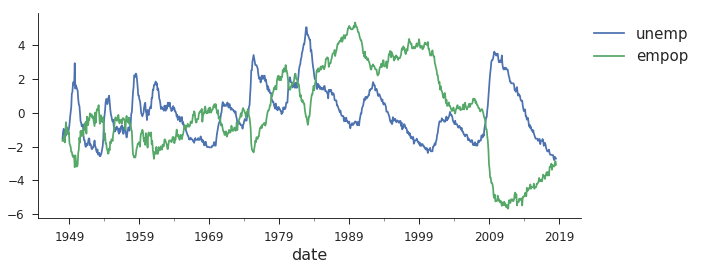

In [269]:
emp.apply(detrend).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [65]:
# detrend poly!
def detrendn(s, deg=1):
    name = s.name
    df = s.reset_index()
    df['year'] = df['date'].dt.year
    df['zyear'] = df['year'] - df['year'].min()
    reg = []
    for n in range(deg+1):
        ds = f'year{n}'
        df[ds] = df['zyear']**n
        reg.append(ds)
    reg = f'{name} ~ ' + ' + '.join(reg)
    ret = smf.ols(reg, data=df).fit()
    pred = pd.Series(ret.predict(), index=s.index)
    return s - pred

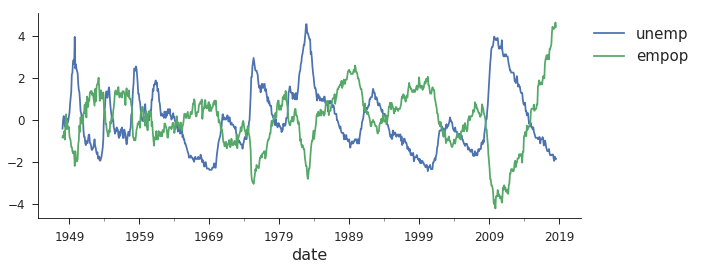

In [270]:
emp.apply(lambda s: detrendn(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

In [68]:
# let's not reinvent the wheel
def detrendn1(s, deg=1):
    year = s.index.year
    zyear = year - year.min()
    coef = np.polyfit(zyear, s, deg)
    vals = np.polyval(coef, zyear)
    pred = pd.Series(vals, index=s.index, name=s.name)
    return s - pred

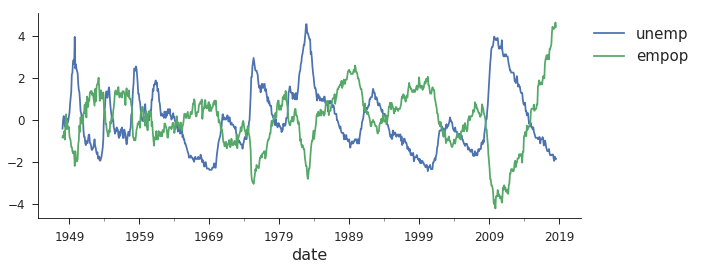

In [271]:
emp.apply(lambda s: detrendn1(s, deg=3)).plot(figsize=(10, 4));
plt.legend(bbox_to_anchor=(1.0, 1.0));

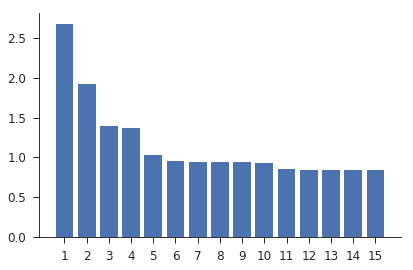

In [70]:
dvec = np.arange(1, 15+1)
plt.bar(dvec, [np.std(detrendn1(emp['empop'], deg=d)) for d in dvec]);
plt.xticks(dvec);

# Regressions

## Basic

In [71]:
N = 100
x = np.random.randn(N)
y = 3*np.random.randn(N)
z = 1 + 2*x + 3*y + 4*x*y + np.random.randn(N)
df = pd.DataFrame({
    'x': x,
    'y': y,
    'z': z
})

In [72]:
ret = smf.ols('z ~ 1 + x + y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     35.77
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.31e-12
Time:                        00:17:47   Log-Likelihood:                -382.70
No. Observations:                 100   AIC:                             771.4
Df Residuals:                      97   BIC:                             779.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5527      1.146      1.354      0.179      -0.723       3.828
x             -0.1099      1.147     -0.096      0.924      -2.387       2.167
y              3.6404      0.430      8.458      0.000       2.786       4.495
==============================================================================
Omnibus:                       12.431   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               33.327
Skew:                          -0.250   Prob(JB):                     5.80e-08
Kurtosis:                       5.784   Cond. No.                         2.83
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
ret.params

Intercept    1.552729
x           -0.109876
y            3.640365
dtype: float64

In [74]:
ret = smf.ols('z ~ 1 + x*y', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      z   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     7767.
Date:                Wed, 26 Sep 2018   Prob (F-statistic):          2.11e-114
Time:                        00:17:48   Log-Likelihood:                -135.52
No. Observations:                 100   AIC:                             279.0
Df Residuals:                      96   BIC:                             289.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1240      0.097     11.544      0.000       0.931       1.317
x              2.0693      0.099     20.862      0.000       1.872       2.266
y              3.0049      0.037     81.345      0.000       2.932       3.078
x:y            4.0359      0.035    115.627      0.000       3.967       4.105
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.336
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.262
Skew:                          -0.272   Prob(JB):                        0.532
Kurtosis:                       2.918   Cond. No.                         3.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

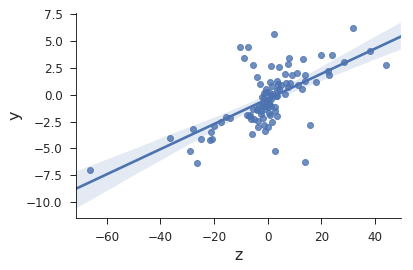

In [75]:
sns.regplot('z', 'y', data=df);

## Categorical

In [76]:
# make some fake data
N = 100
block = np.random.randint(4, size=N)
cmean = np.array([0.1, 0.2, 0.3, 0.4])
cvars = np.array([0.2, 0.1, 0.5, 0.2])
value = cmean[block] + np.random.randn(N)*cvars[block]
df = pd.DataFrame({
    'block': block,
    'value': value
})

In [77]:
ret = smf.ols('value ~ 0 + C(block)', data=df).fit()
ret.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     6.948
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           0.000279
Time:                        00:17:50   Log-Likelihood:                 20.266
No. Observations:                 100   AIC:                            -32.53
Df Residuals:                      96   BIC:                            -22.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
C(block)[0]     0.1497      0.035      4.263      0.000       0.080       0.219
C(block)[1]     0.1947      0.035      5.629      0.000       0.126       0.263
C(block)[2]     0.1325      0.052      2.545      0.013       0.029       0.236
C(block)[3]     0.3971      0.048      8.355      0.000       0.303       0.491
==============================================================================
Omnibus:                       14.592   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.270
Skew:                           0.673   Prob(JB):                     2.41e-05
Kurtosis:                       4.815   Cond. No.                         1.51
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
ret.params - cmean

C(block)[0]    0.049656
C(block)[1]   -0.005327
C(block)[2]   -0.167487
C(block)[3]   -0.002863
dtype: float64

In [79]:
stderr_reg = np.sqrt(ret.cov_params().values.diagonal())
stderr_rob = np.sqrt(ret.cov_HC0.diagonal())

## Bootstrapping

In [80]:
from sklearn.utils import resample

In [81]:
def gen_block_data(N, cmean, cvars):
    cmean = np.array(cmean)
    cvars = np.array(cvars)
    block = np.random.randint(len(cmean), size=N)
    value = cmean[block] + np.random.randn(N)*cvars[block]
    return pd.DataFrame({
        'block': block,
        'value': value
    })

In [82]:
N = 100
K = 1000
cmean = [0.1, 0.2, 0.3, 0.4]
cvars = [0.2, 0.1, 0.5, 0.2]
mygen = lambda: gen_block_data(N, cmean, cvars)
myeqn = 'value ~ 0 + C(block)'
data0 = mygen()
mysamp = lambda: resample(data0)

In [83]:
res = pd.DataFrame({i: smf.ols(myeqn, data=mygen()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp0 = res.std().values

In [84]:
res = pd.DataFrame({i: smf.ols(myeqn, data=mysamp()).fit().params for i in range(K)}).T
res.columns = ['b0', 'b1', 'b2', 'b3']
stderr_bsp = res.std().values

In [85]:
pd.DataFrame({
    'stderr_reg': stderr_reg,
    'stderr_rob': stderr_rob,
    'stderr_bsp0': stderr_bsp0,
    'stderr_bsp': stderr_bsp
}).T

,0,1,2,3
stderr_reg,0.035104,0.034584,0.052067,0.047531
stderr_rob,0.032450,0.014717,0.088217,0.048297
stderr_bsp0,0.040200,0.020308,0.104419,0.040673
stderr_bsp,0.036226,0.017416,0.100036,0.035054


In [86]:
(2*(1/(stderr_bsp0/cvars)))**2/N

array([0.99007563, 0.9698687 , 0.91714689, 0.96716595])

## MAPS

In [145]:
import geopandas as gpd

In [147]:
pref = gpd.read_file('/media/Solid/data/china_firms_plus/prefect/polys/v6_time_pref_pgn_utf_wgs84.shp')
pref = pref.rename(columns={'NAME_CH': 'name_old'})
print(pref.shape)
print(pref.columns)

(3830, 24)
Index(['NAME_PY', 'name_old', 'NAME_FT', 'X_COOR', 'Y_COOR', 'PERS_LOC',
       'TYPE_PY', 'TYPE_CH', 'LEV_RANK', 'BEG_YR', 'BEG_RULE', 'END_YR',
       'END_RULE', 'NOTE_ID', 'OBJ_TYPE', 'SYS_ID', 'GEO_SRC', 'COMPILER',
       'GECOMPLR', 'CHECKER', 'ENT_DATE', 'BEG_CHG_TY', 'END_CHG_TY',
       'geometry'],
      dtype='object')


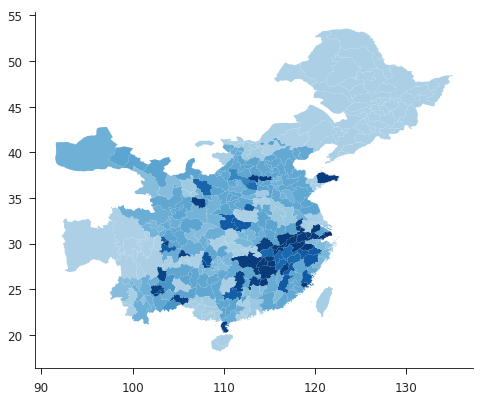

In [161]:
pref.query('END_YR == 1911').plot(column='BEG_YR', cmap='Blues_r', vmax=2200, figsize=(7, 7));

In [148]:
def get_year(yr, drop_invalid=False):
    df = pref.query(f'BEG_YR <= {yr} and END_YR >= {yr}')
    if drop_invalid:
        df = df[df.is_valid]
    return df

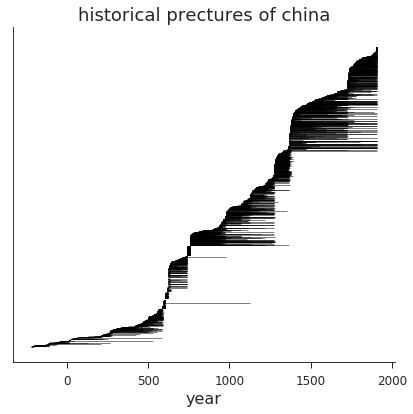

In [152]:
fig, ax = plt.subplots(figsize=(6, 6))
pref_range = pref.sort_values('BEG_YR')[['BEG_YR', 'END_YR']].set_index(np.arange(len(pref)))
for (i, (b, e)) in pref_range.iterrows():
    ax.hlines(i, b, e, linewidth=0.5)
ax.yaxis.set_visible(False);
ax.set_xlabel('year');
ax.set_title('historical prectures of china');

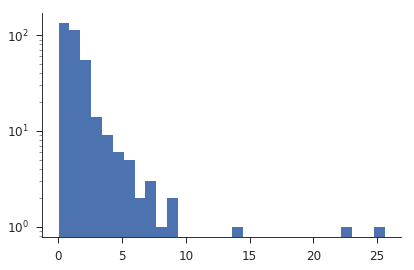

In [172]:
pref.query('END_YR == 1911').area.hist(log=True, bins=30, grid=False);

# Machine Learning

In [173]:
import tensorflow as tf

## Regression

$$\log(\mathcal{L}) = -\frac{N}{2}\log(2\pi)-N\log(\sigma)-\sum_i \frac{1}{2}\left(\frac{y_i-\beta x_i}{\sigma}\right)^2$$

In [209]:
N = 1000
dat_x = 10*np.random.randn(N)
dat_y = 1 + 2*dat_x + 3*np.random.randn(N)

In [216]:
x = tf.placeholder(tf.float64, name='x')
y = tf.placeholder(tf.float64, name='y')
data = {x: dat_x, y: dat_y}

In [217]:
beta0 = tf.Variable(1.0, dtype=tf.float64, name='beta0')
beta1 = tf.Variable(1.0, dtype=tf.float64, name='beta1')

In [218]:
yhat = beta0 + beta1*x
mse = tf.reduce_mean((y-yhat)**2)
sigma = (N/(N-1))*tf.sqrt(mse)

In [219]:
init = tf.global_variables_initializer()
opt = tf.train.GradientDescentOptimizer(learning_rate=0.01)
minn = opt.minimize(mse)

In [220]:
with tf.Session().as_default():
    init.run()
    for i in range(1000):
        minn.run(feed_dict=data)
    print(f'beta0 = {beta0.eval()}')
    print(f'beta1 = {beta1.eval()}')
    print(f'sigma = {sigma.eval(feed_dict=data)}')

beta0 = 0.9886704154798132
beta1 = 1.998202088521527
sigma = 3.0311842198384715


In [221]:
df = pd.DataFrame({
    'x': dat_x,
    'y': dat_y
})
ret = smf.ols('y ~ 1 + x', data=df).fit()
print(f'beta0 = {ret.params.iloc[0]}')
print(f'beta1 = {ret.params.iloc[1]}')
print(f'sigma = {np.sqrt(ret.mse_resid)}')

beta0 = 0.9886704154635587
beta1 = 1.998202088521499
sigma = 3.031185738467459


## Text Analysis

In [117]:
import os
import re
import json
import time
import html
import sklearn.feature_extraction.text as fe
from sklearn.model_selection import train_test_split
import tflearn
from tflearn.data_utils import to_categorical

In [118]:
def clean_tweet(text):
    text = text.lower().strip()

    # odd subs
    text = re.sub(r'’', '\'', text)
    text = re.sub(r'—', '-', text)

    # urls
    text = re.sub(r'\bhttps?://[\S]*\b', r' ', text)
    text = html.unescape(text)

    # acronyms
    text = re.sub(r'\.{2,}', r'.', text)
    text = re.sub(r'(\S)\.(\S)\.', r'\1\2', text)
    text = re.sub(r'(\S)\.(\S)\.(\S)\.', r'\1\2\3', text)

    # control chars
    text = re.sub(r'([!\.&,])', r' \1 ', text)
    text = re.sub(r'[^ a-z0-9#@!\.&,\']', r' ', text)
    text = re.sub(r'[0-9\']', r'', text)

    # clean up
    text = re.sub(r' {2,}', r' ', text)
    text = text.strip()

    # combine
    return text

In [119]:
trump_dir = '/media/Liquid/data/tweets/trump_tweet_data_archive'
tweets16 = pd.read_json(os.path.join(trump_dir, 'condensed_2016.json'))
tweets17 = pd.read_json(os.path.join(trump_dir, 'condensed_2017.json'))
tweets = pd.concat([tweets16, tweets17])

rt_mark = tweets['text'].apply(lambda s: s.startswith('"@') or s.startswith('rt'))
tweets = tweets[(~tweets['is_retweet'])&(~rt_mark)&tweets['in_reply_to_user_id_str'].isnull()]
tweets['isource'] = tweets['source'].map({'Twitter for iPhone': 0, 'Twitter for Android': 1})
tweets = tweets.dropna(subset=['isource'])
tweets['isource'] = tweets['isource'].astype(np.int)
tweets['clean_text'] = tweets['text'].apply(clean_tweet)

In [120]:
corpus = list(tweets['clean_text'])
categ = to_categorical(tweets['isource'].values, 2)
print(len(corpus))

3460


In [121]:
tfidf = fe.TfidfVectorizer()
counts = tfidf.fit_transform(corpus).todense()
n_twt, n_wrd = counts.shape

In [122]:
(train_x, valid_x, train_y, valid_y) = train_test_split(counts, categ, test_size=0.1)

In [123]:
def generate_nn(n_wrd, nn_size, dropout):
    net = tflearn.input_data([None, n_wrd])
    net = tflearn.fully_connected(net, nn_size, activation='softmax')
    net = tflearn.dropout(net, 1-dropout)
    net = tflearn.fully_connected(net, 2, activation='softmax')
    net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')
    model = tflearn.DNN(net, clip_gradients=0.0, tensorboard_verbose=1,
        tensorboard_dir='/tmp/tflearn_logs/neural', checkpoint_path='checkpoints/neural')
    return model

In [124]:
model = generate_nn(n_wrd, 128, 0.5)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [125]:
run_id = 'neural_%s' % time.strftime('%Y_%m%d_%H%M')
model.fit(train_x, train_y, validation_set=(valid_x, valid_y),
          show_metric=True, n_epoch=25, run_id=run_id)

Training Step: 1224  | total loss: 0.36798 | time: 1.131s
| Adam | epoch: 025 | loss: 0.36798 - acc: 0.8934 -- iter: 3072/3114
Training Step: 1225  | total loss: 0.36526 | time: 2.162s
| Adam | epoch: 025 | loss: 0.36526 - acc: 0.8963 | val_loss: 0.44807 - val_acc: 0.8064 -- iter: 3114/3114
--
INFO:tensorflow:/media/Liquid/work/data_science/checkpoints/neural-1225 is not in all_model_checkpoint_paths. Manually adding it.


In [126]:
valid_prob = model.predict(valid_x)
valid_pred = np.array(valid_prob).argmax(axis=1)
valid_bin = np.array(valid_y).argmax(axis=1)
valid_acc = (valid_bin==valid_pred).mean()

In [127]:
all_prob = model.predict(counts)
android_prob = all_prob[:, 1]
androidy = list(tweets['text'].iloc[android_prob.argsort()[::-1]])

In [132]:
print('\n\n'.join(androidy[:5]))

Only reason the hacking of the poorly defended DNC is discussed is that the loss by the Dems was so big that they are totally embarrassed!

It was just announced-by sources-that no charges will be brought against Crooked Hillary Clinton. Like I said, the system is totally rigged!

I am not just running against Crooked Hillary Clinton, I am running against the very dishonest and totally biased media - but I will win!

Hillary and the Dems were never going to beat the PASSION of my voters. They saw what was happening in the last two weeks before the......

Very sad that a person who has made so many mistakes, Crooked Hillary Clinton, can put out such false and vicious ads with her phony money!


In [144]:
print('\n\n'.join(androidy[-5:]))

THANK YOU, AMERICA! #Trump2016
#MakeAmericaGreatAgain 
https://t.co/09hTbBgPHf https://t.co/uJnmDnvkUv

Thank you, America!
#MakeAmericaGreatAgain #Trump2016 https://t.co/7xxWD0au9H

THANK YOU AMERICA! 
#MakeAmericaGreatAgain #Trump2016 https://t.co/TRrdR0nlpM

Thank you America! #Trump2016
#MakeAmericaGreatAgain https://t.co/8B0J8Xt3dh

THANK YOU!  
#MakeAmericaGreatAgain #Trump2016
https://t.co/nvgOPoo5qf https://t.co/0JCjfbcpJZ
